In [153]:
## ======== Run this Cell as it is======== ##

from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")


## ================================ ##

<h1 style="background-color:#ABFF9B;font-size:20px;color:#00033E;font-weight : bold">COVID-19 Genome Analysis  </h1>

### Importing The packages

In [136]:
import Bio
from Bio import Entrez, SeqIO
import matplotlib.pyplot as plt
from numpy import*
import numpy as np 

### Uploading The Datasets
* **Genome:** SARS-CoV2
* **Source:** NCBI_GenBank
* **Acc No:** NC_045512.2

In [137]:
Entrez.email = "" 
handle = Entrez.efetch(db="nucleotide", id="NC_045512.2", rettype="gb", retmode="text")
recs = list(SeqIO.parse(handle, 'gb'))
handle.close()

In [138]:
print(recs)

[SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512', description='Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=['BioProject:PRJNA485481'])]


In [139]:
covid_dna = recs[0].seq

### Genome Size

In [140]:
print(f'The genome of Covid-19 consists of {len(covid_dna)} Kb.')

The genome of Covid-19 consists of 29903 Kb.


Genome of Covid-19 around 29.9 Kb in size

### Molecular weight

In [141]:
from Bio.SeqUtils import molecular_weight
molecular_weight(covid_dna)

9241219.214400413

**GC content:** higher GC content implies more stable molecule due to G and C forming triple hydrogen bonds

In [142]:
from Bio.SeqUtils import GC
GC(covid_dna)

37.97277865097148

### Distribution of nucleotides in COVID-19 genome

In [143]:
count_nucleotides = {
    'A': covid_dna.count('A'),
    'T': covid_dna.count('T'),
    'C': covid_dna.count('C'),
    'G': covid_dna.count('G')
}

In [144]:
count_nucleotides

{'A': 8954, 'T': 9594, 'C': 5492, 'G': 5863}

In [145]:
A = [8954]
T = [9594] 
C = [5492]
G = [5863]

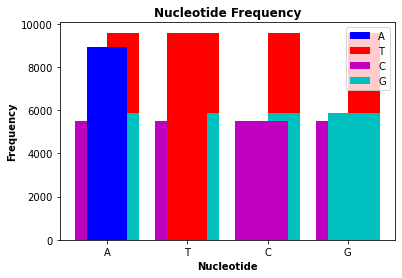

In [146]:
width = 0.5
plt.bar(ax + 0.2, A, 0.4, label = 'A',color= "b")
plt.bar(ax + 0.2, T, 0.4, label = 'T',color= "r")
plt.bar(ax - 0.2, C, 0.4, label = 'C',color= "m")
plt.bar(ax + 0.2, G, 0.4, label = 'G',color= "c")

plt.bar(count_nucleotides.keys(), count_nucleotides.values(), width, color=['b', 'r', 'm', 'c'])
plt.xlabel('Nucleotide', weight='bold', size=10)
plt.ylabel('Frequency', weight='bold', size=10)
plt.title('Nucleotide Frequency', weight='bold')
plt.legend()
plt.show()

* First observation: The frequency of the AT content is higher than the frequency of CG content, means genome is quite flexible and able to interact with other molecules like DNA and Proteins of the host cells


### Transcription
* Transcription is the first step in gene expression. It involves copying a gene's DNA sequence to make an RNA molecule.

In [147]:
covid_mrna = covid_dna.transcribe()
covid_mrna

Seq('AUUAAAGGUUUAUACCUUCCCAGGUAACAAACCAACCAACUUUCGAUCUCUUGU...AAA')

### Translation
* Translation is the process that takes the information passed from DNA as messenger RNA and turns it into a series of amino acids.

In [149]:
covid_aa = covid_mrna.translate()
covid_aa

Seq('IKGLYLPR*QTNQLSISCRSVL*TNFKICVAVTRLHA*CTHAV*LITNYCR*QD...KKK')

### Most common amino acids

In [150]:
from collections import Counter
common_amino = Counter(covid_aa)
common_amino.most_common(10)

[('L', 886),
 ('S', 810),
 ('*', 774),
 ('T', 679),
 ('C', 635),
 ('F', 593),
 ('R', 558),
 ('V', 548),
 ('Y', 505),
 ('N', 472)]

In [151]:
L = [886]
S = [810]
T = [679]

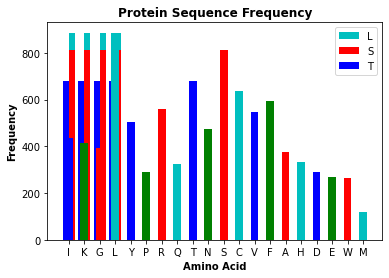

In [152]:
del common_amino['*']
width = 0.5
plt.bar(ax + 0.2, L, 0.4, label = 'L',color= "c")
plt.bar(ax + 0.2, S, 0.4, label = 'S',color= "r")
plt.bar(ax - 0.2, T, 0.4, label = 'T',color= "b")


plt.bar(common_amino.keys(), common_amino.values(), width, color=['b', 'g', 'r', 'c'])
plt.xlabel('Amino Acid', weight='bold', size=10)
plt.ylabel('Frequency', weight='bold', size=10)
plt.title('Protein Sequence Frequency', weight='bold')
plt.legend()
plt.show()

### Total Anmino Acids

In [123]:
print(f"Covid-19's genome has {sum(common_amino.values())} amino acids")

Covid-19's genome has dict_values([436, 413, 394, 886, 505, 292, 558, 325, 679, 472, 810, 635, 548, 593, 375, 332, 290, 270, 263, 117]) amino acids


In [124]:
proteins = covid_aa.split('*')

In [125]:
proteins[:5]

[Seq('IKGLYLPR'),
 Seq('QTNQLSISCRSVL'),
 Seq('TNFKICVAVTRLHA'),
 Seq('CTHAV'),
 Seq('LITNYCR')]

In [126]:
print(f'We have {len(proteins)} amino acids in the covid-19 genome')

We have 775 amino acids in the covid-19 genome


* Only the sequences with more than 20 amino acids code for functional proteins. The shorter amino acid sequences are oligopeptides and have other functionalities. Here, we will focus on the chains with more than 20 amino acid chains: Proteins.



In [127]:
for protein in proteins:
    if len(protein) < 20:
        proteins.remove(protein)

In [128]:
print(f'We have {len(proteins)} proteins with more than 20 amino acids in the covid-19 genome')

We have 409 proteins with more than 20 amino acids in the covid-19 genome


In [129]:
top_5_proteins = sorted(proteins, key = len)

In [119]:
top_5_proteins[-1]

Seq('CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKTNCCRFQ...VNN')

In [130]:
len(top_5_proteins[-1])

2701

### Summary of Findings
* Sequence length: 29.9 Kbs in size 
* GC content: 37.9%
* Has high amount of Leucine L, Serine S and Threonine T
* 409 proteins with more than 20 amino acids
* The largest protein is of length of 2,701 amino acid.

@Mahendra Singh | SCIS, JNU